In [1]:
# Loading Libraries
import polars as pl
import polars.selectors as cs
from plotnine import *
from mizani.labels import label_number
import sys 

print(f'My System version is {sys.version};\nPolars version is {pl.__version__}.')

My System version is 3.12.4 (main, Jun  6 2024, 18:26:44) [Clang 15.0.0 (clang-1500.3.9.4)];
Polars version is 1.1.0.
My System version is 3.12.4 (main, Jun  6 2024, 18:26:44) [Clang 15.0.0 (clang-1500.3.9.4)];
Polars version is 1.1.0.


In [2]:
# Load the load
url = 'https://raw.githubusercontent.com/tongakuot/python_tutorials/main/00_data/ss_2008_census_data_raw.csv'

# Tell polars how to label missing values
census_raw = pl.read_csv(url, null_values='NA')

# Inspect the data
print(census_raw)

shape: (453, 10)
┌─────────┬─────────┬─────────┬─────────┬───┬────────┬───────┬────────┬────────┐
│ Region  ┆ Region  ┆ Region  ┆ Variabl ┆ … ┆ Age    ┆ Scale ┆ Units  ┆ 2008   │
│ ---     ┆ Name    ┆ - Regio ┆ e       ┆   ┆ Name   ┆ ---   ┆ ---    ┆ ---    │
│ str     ┆ ---     ┆ nId     ┆ ---     ┆   ┆ ---    ┆ str   ┆ str    ┆ i64    │
│         ┆ str     ┆ ---     ┆ str     ┆   ┆ str    ┆       ┆        ┆        │
│         ┆         ┆ str     ┆         ┆   ┆        ┆       ┆        ┆        │
╞═════════╪═════════╪═════════╪═════════╪═══╪════════╪═══════╪════════╪════════╡
│ KN.A2   ┆ Upper   ┆ SS-NU   ┆ KN.B2   ┆ … ┆ Total  ┆ units ┆ Person ┆ 964353 │
│         ┆ Nile    ┆         ┆         ┆   ┆        ┆       ┆ s      ┆        │
│ KN.A2   ┆ Upper   ┆ SS-NU   ┆ KN.B2   ┆ … ┆ 0 to 4 ┆ units ┆ Person ┆ 150872 │
│         ┆ Nile    ┆         ┆         ┆   ┆        ┆       ┆ s      ┆        │
│ KN.A2   ┆ Upper   ┆ SS-NU   ┆ KN.B2   ┆ … ┆ 5 to 9 ┆ units ┆ Person ┆ 151467 │
│         ┆

In [3]:
# Let's import our custom function censuspy as cy
import censuspy as cy
census = (
    cy.tweak_census(
    census_raw, 
    grouping_cols='category', 
    condition=~((pl.col('gender') == 'Total') | (pl.col('category') == 'Total')) 
    )
    .with_columns(labels=(pl.col('total') / 1000000).round(2))
)

# inspect the first 5 rows
print(census)

shape: (7, 3)
┌──────────────┬─────────┬────────┐
│ category     ┆ total   ┆ labels │
│ ---          ┆ ---     ┆ ---    │
│ str          ┆ i64     ┆ f64    │
╞══════════════╪═════════╪════════╡
│ 0-14         ┆ 3659337 ┆ 3.66   │
│ 15-24        ┆ 1628835 ┆ 1.63   │
│ 25-34        ┆ 1234926 ┆ 1.23   │
│ 35-44        ┆ 815517  ┆ 0.82   │
│ 45-54        ┆ 473365  ┆ 0.47   │
│ 55-64        ┆ 237426  ┆ 0.24   │
│ 65 and above ┆ 211084  ┆ 0.21   │
└──────────────┴─────────┴────────┘
shape: (7, 3)
┌──────────────┬─────────┬────────┐
│ category     ┆ total   ┆ labels │
│ ---          ┆ ---     ┆ ---    │
│ str          ┆ i64     ┆ f64    │
╞══════════════╪═════════╪════════╡
│ 0-14         ┆ 3659337 ┆ 3.66   │
│ 15-24        ┆ 1628835 ┆ 1.63   │
│ 25-34        ┆ 1234926 ┆ 1.23   │
│ 35-44        ┆ 815517  ┆ 0.82   │
│ 45-54        ┆ 473365  ┆ 0.47   │
│ 55-64        ┆ 237426  ┆ 0.24   │
│ 65 and above ┆ 211084  ┆ 0.21   │
└──────────────┴─────────┴────────┘


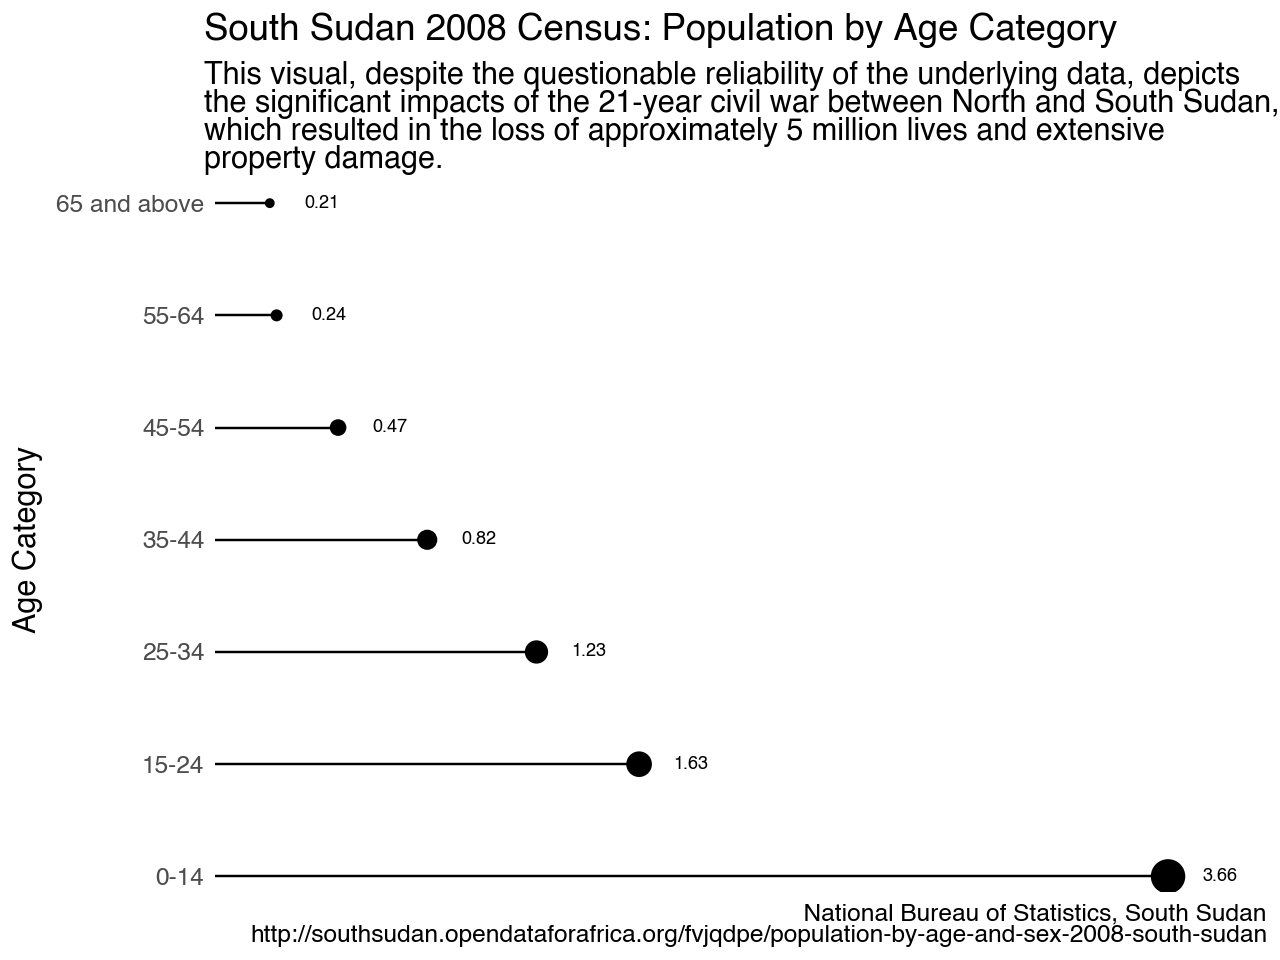

In [9]:
# Plotting a lollipop plot with plotnine library
caption_1 = '{:>124}'.format('National Bureau of Statistics, South Sudan')
caption_2 = 'http://southsudan.opendataforafrica.org/fvjqdpe/population-by-age-and-sex-2008-south-sudan'

(
    ggplot(census, aes('total', 'category'))
    + geom_point(aes(size='total'), show_legend=False)
    + geom_segment(aes(y='category', yend='category', x=0, xend='total'))
    + geom_text(aes(label='labels'), size=6.5, nudge_x=200_000)
    + scale_x_continuous(
        labels=label_number(scale=1e-6, suffix='M'),
        expand=(0.01, 0.01),
        limits=(0, 4_000_000)
    )
    + scale_y_discrete(expand=(0.02, 0.02))
     + labs(
        x=None,
        y='Age Category',
        title='South Sudan 2008 Census: Population by Age Category',
        subtitle=f'This visual, despite the questionable reliability of the underlying data, depicts\nthe significant impacts of the 21-year civil war between North and South Sudan,\nwhich resulted in the loss of approximately 5 million lives and extensive \nproperty damage.',
        caption=f'{caption_1}\n{caption_2}'
    )
    + theme(
        plot_title=element_text(hjust=0),
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),        
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
        axis_title_x=element_blank(),
        axis_ticks=element_blank(),
        panel_background=element_blank(),
        plot_caption=element_text(ha='right')
    )
   
)